In [12]:
import numpy as np

from skimage import measure

from glob import glob

from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator

from utils.data_manager import *
from utils.ml_utils import *
from utils.preprocess import *

import matplotlib.pyplot as plt

In [2]:
model = load_model('saved_models/model-babystep3-control-triple-binary-classification.h5')

model2 = load_model('model-babystep3-fcn-rmoved-tertiary-classification-improved2.h5')

model3 = load_model('saved_models/model-babystep3-composite-tertiary-classification.h5')

In [3]:
p1_h = load_patient('project1/CCM_Data/Benign/001', hu=True)
p1 = load_patient('project1/CCM_Data/Benign/001', hu=False)

/home/haedaal/workspace/utils/data_manager.py:62: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if _m == None:


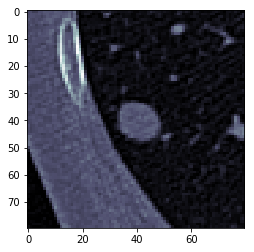

1415/1415 [==============================] - 21s     

In [10]:
image = p1['image']
hued = p1_h['image']

mask = p1['mask']
roi = segmentation_3D(p1_h, True)[:,:,:,1]

shape = image.shape

lesions = []

for idx, mslice in enumerate(mask):
    regions = measure.regionprops(measure.label(mslice))
    for region in regions:
        centroid = region.centroid
        x, y = int(centroid[0]), int(centroid[1])
        cropped = image[idx][x-40:x+40, y-40: y+40]
        plt.imshow(cropped, plt.cm.bone)
        plt.show()
        pred = model.predict_classes(preprocess(cropped.reshape((1,80,80,1))))
        lesions.append({'pred': pred, 'coord':(idx, x, y)})
        
coords = []
        
for idx in range(shape[0]):
    for xi in range(20):
        for yi in range(20):
            if roi[idx][66 + xi * 20][66 + yi * 20] == 0:
                pass
            else:
                x = 26 + xi * 20
                y = 26 + yi * 20
                coords.append(preprocess(image[idx,x:x+80,y:y+80].reshape((1,80,80,1))))
                
spots = np.vstack(coords)
pred = model.predict_classes(spots)


In [11]:
print(lesions)
np.unique(pred, return_counts=True)

[{'coord': (11, 326, 64), 'pred': array([1])}]


(array([0, 1, 2]), array([1411,    2,    2]))

In [13]:
benign = glob('project1/CCM_Data/Benign/*')
malign = glob('project1/CCM_Data/Malignant/*')

['project1/CCM_Data/Benign/034',
 'project1/CCM_Data/Benign/037',
 'project1/CCM_Data/Benign/091',
 'project1/CCM_Data/Benign/086',
 'project1/CCM_Data/Benign/067',
 'project1/CCM_Data/Benign/041',
 'project1/CCM_Data/Benign/011',
 'project1/CCM_Data/Benign/080',
 'project1/CCM_Data/Benign/063',
 'project1/CCM_Data/Benign/023',
 'project1/CCM_Data/Benign/076',
 'project1/CCM_Data/Benign/044',
 'project1/CCM_Data/Benign/085',
 'project1/CCM_Data/Benign/045',
 'project1/CCM_Data/Benign/035',
 'project1/CCM_Data/Benign/012',
 'project1/CCM_Data/Benign/083',
 'project1/CCM_Data/Benign/017',
 'project1/CCM_Data/Benign/021',
 'project1/CCM_Data/Benign/079',
 'project1/CCM_Data/Benign/016',
 'project1/CCM_Data/Benign/069',
 'project1/CCM_Data/Benign/024',
 'project1/CCM_Data/Benign/066',
 'project1/CCM_Data/Benign/055',
 'project1/CCM_Data/Benign/010',
 'project1/CCM_Data/Benign/043',
 'project1/CCM_Data/Benign/022',
 'project1/CCM_Data/Benign/073',
 'project1/CCM_Data/Benign/008',
 'project1